<a href="https://colab.research.google.com/github/Rakshit2909/Machine-Learning/blob/Wine-Dataset/Wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#Train Test Split
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#for plotting graphs
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#downloaded the dataset file from the given link in the pdf
#uploaded the file from the system using upload to storage session

!unzip redwine.zip #command to unzip the file

Archive:  redwine.zip
  inflating: winequality-red.csv     


In [3]:
wqr=pd.read_csv("winequality-red.csv",sep=',')
wqr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wqr['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
wqr.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#giving detailed count of each quality
wqr['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
# make split (dataframe and series)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wqr.drop(columns='quality'),wqr['quality'],test_size=0.40)


In [8]:
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((959, 11), (640, 11), (959,), (640,))

In [9]:
wqr.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [10]:
#creating models
regress=LogisticRegression(max_iter=10000)
machine= SVC()
tree= DecisionTreeClassifier()
GNB= GaussianNB()
knn= KNeighborsClassifier(n_neighbors=12)

#Training Models
regress.fit(Xtrain,Ytrain)
machine.fit(Xtrain,Ytrain)
tree.fit(Xtrain,Ytrain)
GNB.fit(Xtrain,Ytrain)
knn.fit(Xtrain,Ytrain)

# make evaluate model (using R2 score)
print('regress Score (training): ',regress.score(Xtrain,Ytrain))
print('regress Score (testing): ',regress.score(Xtest,Ytest))

print('machine Score (training): ',machine.score(Xtrain,Ytrain))
print('machine Score (testing): ',machine.score(Xtest,Ytest))

print('treeScore (training): ',tree.score(Xtrain,Ytrain))
print('tree Score (testing): ',tree.score(Xtest,Ytest))

print('GNB Score (training): ',GNB.score(Xtrain,Ytrain))
print('GNB Score (testing): ',GNB.score(Xtest,Ytest))

print('KNN Score (training): ',knn.score(Xtrain,Ytrain))
print('KNN Score (testing): ',knn.score(Xtest,Ytest))

regress Score (training):  0.6225234619395204
regress Score (testing):  0.5828125
machine Score (training):  0.5088633993743483
machine Score (testing):  0.5046875
treeScore (training):  1.0
tree Score (testing):  0.59375
GNB Score (training):  0.5683003128258602
GNB Score (testing):  0.5484375
KNN Score (training):  0.5964546402502607
KNN Score (testing):  0.49375


In [11]:
#all are almost equal but DecisionTreeClassifier has the maximum acuracy score...
#So for predicting all given qualities we will have tree as our model
tree.score(wqr.drop(columns='quality'),wqr['quality'])

0.8373983739837398

In [12]:
#as the mean of wine quality is 5.63 we would take 6 as a parameter for having a great quality of wine
# now we will classify it into 2 classes 0,1(great or average)
wqr['Quality Check']= [0 if x<=6 else 1 for x in wqr['quality'] ]
wqr['Quality Check'].value_counts()


0    1382
1     217
Name: Quality Check, dtype: int64

In [13]:
wqr.corr()['Quality Check']

fixed acidity           0.120061
volatile acidity       -0.270712
citric acid             0.214716
residual sugar          0.047779
chlorides              -0.097308
free sulfur dioxide    -0.071747
total sulfur dioxide   -0.139517
density                -0.150460
pH                     -0.057283
sulphates               0.199485
alcohol                 0.407315
quality                 0.710196
Quality Check           1.000000
Name: Quality Check, dtype: float64

<Axes: >

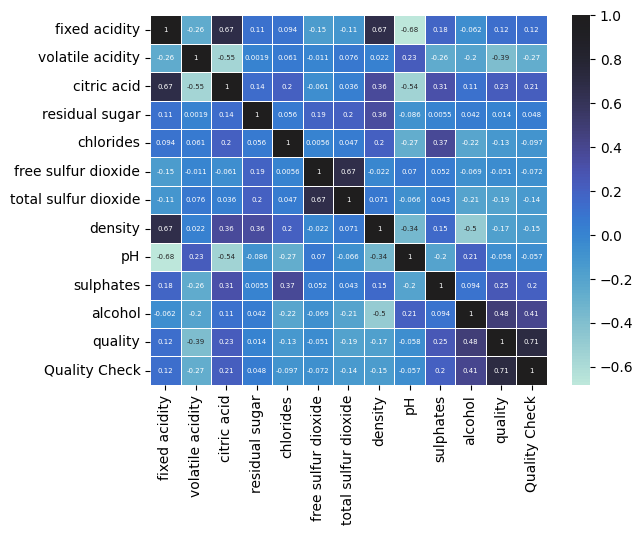

In [14]:
sns.heatmap(wqr.corr(),annot=True,center=True,linewidth=0.5, annot_kws={'size': 5})

In [15]:
# make split (dataframe and series)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wqr.drop(columns='Quality Check'),wqr['Quality Check'],test_size=0.25)


In [16]:
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((1199, 12), (400, 12), (1199,), (400,))

In [17]:
regress2=LogisticRegression(max_iter=10000)
machine2= SVC(kernel='linear')
tree2= DecisionTreeClassifier()
GNB2= GaussianNB()
knn2= KNeighborsClassifier(n_neighbors=17)

regress2.fit(Xtrain,Ytrain)
machine2.fit(Xtrain,Ytrain)
tree2.fit(Xtrain,Ytrain)
GNB2.fit(Xtrain,Ytrain)
knn2.fit(Xtrain,Ytrain)

# make evaluate model (using R2 score)
print('regress Score (training): ',regress2.score(Xtrain,Ytrain))
print('regress Score (testing): ',regress2.score(Xtest,Ytest))

print('machine Score (training): ',machine2.score(Xtrain,Ytrain))
print('machine Score (testing): ',machine2.score(Xtest,Ytest))

print('treeScore (training): ',tree2.score(Xtrain,Ytrain))
print('tree Score (testing): ',tree2.score(Xtest,Ytest))

print('GNB Score (training): ',GNB2.score(Xtrain,Ytrain))
print('GNB Score (testing): ',GNB2.score(Xtest,Ytest))

print('KNN Score (training): ',knn2.score(Xtrain,Ytrain))
print('KNN Score (testing): ',knn2.score(Xtest,Ytest))

regress Score (training):  1.0
regress Score (testing):  1.0
machine Score (training):  1.0
machine Score (testing):  1.0
treeScore (training):  1.0
tree Score (testing):  1.0
GNB Score (training):  0.994161801501251
GNB Score (testing):  0.9875
KNN Score (training):  0.8924103419516264
KNN Score (testing):  0.8875


In [18]:
score_dict={}
models = [regress2,machine2,tree2,GNB2,knn2]
for model in models:
  score_dict[model]=  model.score(wqr.drop(columns='Quality Check'),wqr['Quality Check'])
score_dict

{LogisticRegression(max_iter=10000): 1.0,
 SVC(kernel='linear'): 1.0,
 DecisionTreeClassifier(): 1.0,
 GaussianNB(): 0.9924953095684803,
 KNeighborsClassifier(n_neighbors=17): 0.8911819887429644}

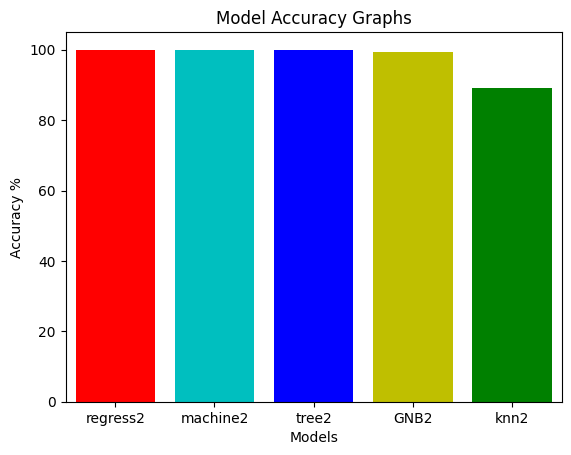

In [19]:

l= list(float(x*100) for x in score_dict.values())
a= sns.barplot(x=['regress2','machine2','tree2','GNB2','knn2'],y= l, saturation=1 ,palette= ['r','c','b','y','g'])
plt.xlabel("Models"),plt.ylabel("Accuracy %"), plt.title('Model Accuracy Graphs')
plt.show()


In [20]:
list(score_dict.values())

[1.0, 1.0, 1.0, 0.9924953095684803, 0.8911819887429644]